# PCA and Random Forest Approach

In [1]:
# import packages
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

In [2]:
# load the data
df = pd.read_csv('R_NN.txt', delimiter = "\t")

# drop blockId
new_df=df.drop(['blkID'], axis=1)

# ordinally encode the lable to 0 or 1
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
new_df["Label"] = ord_enc.fit_transform(df[["Label"]])
print(ord_enc.categories_)
new_df.head()


[array(['Anomaly', 'Normal'], dtype=object)]


,Label,tag_code0,tag_code1,tag_code2,tag_code3,tag_code4,tag_code5,tag_code6,tag_code7,tag_code8,tag_code9,tag_code10,tag_code11,tag_code12,tag_code13
0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Here a label of 1 means not an anomally, and a label of 0 means an anomally

In [3]:
new_df.groupby('Label').count()

,tag_code0,tag_code1,tag_code2,tag_code3,tag_code4,tag_code5,tag_code6,tag_code7,tag_code8,tag_code9,tag_code10,tag_code11,tag_code12,tag_code13
Label,,,,,,,,,,,,,,
0.0,69,69,69,69,69,69,69,69,69,69,69,69,69,69
1.0,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932


In the actual data set, there are 68 anomalies and 1926 non-anomalies

In [4]:
# split into training and testing sets

from sklearn.model_selection import train_test_split

# split the data in training and testing sets
X = new_df.drop('Label', axis=1)

y = new_df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 2020, stratify=y)

In [5]:
# scale the data
import numpy as np
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [6]:
# run PCA

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

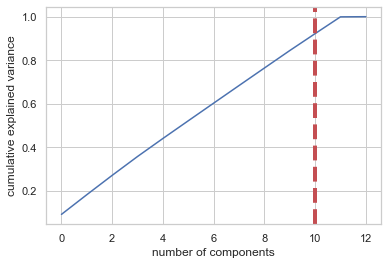

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.091818,0.091818
1,0.182269,0.090451
2,0.271143,0.088874
3,0.357761,0.086618
4,0.440573,0.082812
5,0.521834,0.081261
6,0.602822,0.080988
7,0.683611,0.080789
8,0.764136,0.080525
9,0.844393,0.080257


In [7]:
# run PCA
pca_test = PCA(n_components=13)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

We should keep 10 components ideally based on the plot



In [8]:
# select 10 PCA components
pca = PCA(n_components=10)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)


In [9]:
# print out the PCA components
pca_dims = []

columns=list(new_df.columns)

new_col=columns[1:15]

print(columns)
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, columns=new_col, index=pca_dims)
pca_test_df.head(10).T

['Label', 'tag_code0', 'tag_code1', 'tag_code2', 'tag_code3', 'tag_code4', 'tag_code5', 'tag_code6', 'tag_code7', 'tag_code8', 'tag_code9', 'tag_code10', 'tag_code11', 'tag_code12', 'tag_code13']


,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9
tag_code0,0.869261,-0.024090,-0.179465,-0.136517,-0.179783,0.038194,0.028033,0.000912,-0.005475,-0.008125
tag_code1,-0.060284,0.094758,-0.018725,0.033047,0.396964,0.853676,-0.103003,-0.143550,-0.069904,-0.058884
tag_code2,-0.060034,0.007598,0.158155,0.853446,-0.362788,0.030343,-0.013759,-0.028364,-0.019154,-0.020208
tag_code3,-0.003504,0.000375,0.005753,0.008798,0.029191,-0.005014,0.002576,0.005822,0.004453,0.005351
tag_code4,-0.109889,0.017229,0.802560,-0.397483,-0.235069,0.022844,-0.010549,-0.022014,-0.015091,-0.016146
tag_code5,-0.039728,-0.044220,0.005821,0.037649,0.243626,-0.081643,0.013711,0.300279,0.817033,-0.347552
tag_code6,0.025062,0.000974,0.026823,0.055655,0.384641,-0.405283,-0.696253,-0.344956,-0.121564,-0.089205
tag_code7,-0.041635,-0.043610,0.010245,0.046210,0.336392,-0.241065,0.693190,-0.516839,-0.069105,-0.121552
tag_code8,-0.020294,0.002245,0.036195,0.061654,0.338819,-0.150358,0.130956,0.693320,-0.520109,-0.186490
tag_code9,-0.348287,-0.705063,-0.370079,-0.197470,-0.230928,0.041072,-0.055220,-0.005791,-0.062529,0.015938


In [10]:
# fit this to a random forest model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled_pca, y_train)
display(rfc.score(X_train_scaled_pca, y_train))



0.965625

The training score is 0.9667711598746082

In [11]:
# test the performance
y_pred_pca = rfc.predict(X_test_scaled_pca)


In [12]:
from sklearn.metrics import confusion_matrix

# make a confusion matrix
conf_matrix_baseline_pca = pd.DataFrame(confusion_matrix(y_test, y_pred_pca), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])


In [13]:
# display the results for the test set
display(conf_matrix_baseline_pca)
display('Baseline Random Forest With PCA recall score', recall_score(y_test, y_pred_pca))

,predicted 0,predicted 1
actual 0,0,14
actual 1,0,387


'Baseline Random Forest With PCA recall score'

1.0